In [44]:
import os
import groq

In [45]:
pip install -q groq

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from groq import Groq
import base64


# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "baseimage.png"

# Getting the base64 string
base64_image = encode_image(image_path)

secret_key = ""

client = Groq(api_key= secret_key)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text",
                 "text":
                 """You are an expert chip layout optimizer. Analyze this layout image with the goal of generating alternative arrangements.
                  
                    Analyze the provided chip floorplan image and extract the following key details:
Core Measurements
Provide specific numerical values for:

Total chip dimensions (width * height)
Total chip area
Individual block measurements:

Width and height of each block
Area of each block
Exact coordinates/position of each block
Percentage of total chip area occupied by each block


Block Identification and Properties
For each block in the image:

Block name/identifier
Exact dimensions
Location within the layout
Current aspect ratio

Ensure that all blocks cover the whole area of the image 

Mention
Which blocks are adjacent to each other


Output Requirements
Present all measurements in:

Consistent units
Numerical format with appropriate precision
Percentages rounded to two decimal places
Coordinates relative to a clearly defined origin point


Output all this in strictly JSON format for easeness in the next step
Analyze it fully and follow the chain of thought prompting and get to the final output description


  """},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/png;base64,{base64_image}",
                    },
                },
            ],
        }
    ],
    model="llama-3.2-90b-vision-preview",

)

#print(chat_completion.choices[0].message.content,"\n")
            
description_response  = chat_completion.choices[0].message.content

print(description_response)

**Step 1: Analyze the image and extract key details**

The image shows a chip floorplan with several blocks. The blocks are labeled A, B, C, D, E, F1, F2, F3, and F4.

**Step 2: Extract core measurements**

*   Total chip dimensions: The total width of the chip is the sum of the widths of blocks A, C, D, and F1-4. The total height of the chip is the sum of the heights of blocks A, E, F1-4, and B.

    *   Width of block A = 300 (units)
    *   Width of block C = 400 (units)
    *   Width of block D = 300 (units)
    *   Width of block F1 = 100 (units)
    *   Width of block F2 = 100 (units)
    *   Width of block F3 = 100 (units)
    *   Width of block F4 = 100 (units)
    *   Total width = 300 + 400 + 300 + 100 + 100 + 100 + 100 = 1400 (units)
*   Height of block A = 500 (units)
*   Height of block E = 100 (units)
*   Height of block F1 = 100 (units)
*   Height of block F2 = 100 (units)
*   Height of block F3 = 100 (units)
*   Height of block F4 = 100 (units)
*   Height of block B = 3

Phas2

In [ ]:
#Now i am trying to feed this input in an another llm for dynamic code generation
import json
from groq import Groq


text_key = ""




image_description = {description_response} #Step 1: Identify the Blocks and Their Measurements

# | **Block Name** | **Width** | **Height** | **Area** | **X-Coordinate** | **Y-Coordinate** | **Aspect Ratio** |
# | --- | --- | --- | --- | --- | --- | --- |
# | A | 6 | 8 | 48 | 0 | 0 | 1.33 |
# | B | 4 | 2 | 8 | 0 | 8 | 0.50 |
# | C | 8 | 8 | 64 | 6 | 0 | 1.00 |
# | D | 2 | 8 | 16 | 14 | 0 | 4.00 |
# | E | 4 | 2 | 8 | 0 | 10 | 0.50 |
# | F1 | 2 | 2 | 4 | 4 | 12 | 1.00 |
# | F2 | 2 | 2 | 4 | 6 | 12 | 1.00 |
# | F3 | 2 | 2 | 4 | 8 | 12 | 1.00 |
# | F4 | 2 | 2 | 4 | 10 | 12 | 1.00 |

# **Step 2: Calculate Total Chip Dimensions, Area, and Percentage of Total Chip Area Occupied by Each Block**

# *   Total chip width = 16
# *   Total chip height = 14
# *   Total chip area = 224

# | **Block Name** | **Percentage of Total Chip Area** |
# | --- | --- |
# | A | 21.43% |
# | B | 3.57% |
# | C | 28.57% |
# | D | 7.14% |
# | E | 3.57% |
# | F1 | 1.79% |
# | F2 | 1.79% |
# | F3 | 1.79% |
# | F4 | 1.79% |

# **Step 3: Identify Adjacent Blocks**

# *   Block A is adjacent to blocks B and E.
# *   Block B is adjacent to blocks A and F1.
# *   Block C is adjacent to blocks A, D, and E.
# *   Block D is adjacent to blocks C and E.
# *   Block E is adjacent to blocks A, C, D, F1, F2, F3, and F4.
# *   Block F1 is adjacent to blocks B, E, and F2.
# *   Block F2 is adjacent to blocks E, F1, and F3.
# *   Block F3 is adjacent to blocks E, F2, and F4.
# *   Block F4 is adjacent to blocks E and F3.

# **Step 4: Output Data in JSON Format**

# ```json
# {
#   "blocks": [
#     {
#       "name": "A",
#       "width": 6,
#       "height": 8,
#       "area": 48,
#       "x": 0,
#       "y": 0,
#       "aspectRatio": 1.33
#     },
#     {
#       "name": "B",
#       "width": 4,
#       "height": 2,
#       "area": 8,
#       "x": 0,
#       "y": 8,
#       "aspectRatio": 0.50
#     },
#     {
#       "name": "C",
#       "width": 8,
#       "height": 8,
#       "area": 64,
#       "x": 6,
#       "y": 0,
#       "aspectRatio": 1.00
#     },
#     {
#       "name": "D",
#       "width": 2,
#       "height": 8,
#       "area": 16,
#       "x": 14,
#       "y": 0,
#       "aspectRatio": 4.00
#     },
#     {
#       "name": "E",
#       "width": 4,
#       "height": 2,
#       "area": 8,
#       "x": 0,
#       "y": 10,
#       "aspectRatio": 0.50
#     },
#     {
#       "name": "F1",
#       "width": 2,
#       "height": 2,
#       "area": 4,
#       "x": 4,
#       "y": 12,
#       "aspectRatio": 1.00
#     },
#     {
#       "name": "F2",
#       "width": 2,
#       "height": 2,
#       "area": 4,
#       "x": 6,
#       "y": 12,
#       "aspectRatio": 1.00
#     },
#     {
#       "name": "F3",
#       "width": 2,
#       "height": 2,
#       "area": 4,
#       "x": 8,
#       "y": 12,
#       "aspectRatio": 1.00
#     },
#     {
#       "name": "F4",
#       "width": 2,
#       "height": 2,
#       "area": 4,
#       "x": 10,
#       "y": 12,
#       "aspectRatio": 1.00
#     }
#   ],
#   "chip": {
#     "width": 16,
#     "height": 14,
#     "area": 224
#   },
#   "percentages": {
#     "A": 21.43,
#     "B": 3.57,
#     "C": 28.57,
#     "D": 7.14,
#     "E": 3.57,
#     "F1": 1.79,
#     "F2": 1.79,
#     "F3": 1.79,
#     "F4": 1.79
#   },
#   "adjacencies": {
#     "A": ["B", "E"],
#     "B": ["A", "F1"],
#     "C": ["A", "D", "E"],
#     "D": ["C", "E"],
#     "E": ["A", "C", "D", "F1", F2,F3,F4]
#     }
# }

# **Answer**

# The provided chip floorplan image has been analyzed, and the following key details have been extracted:

# **Core Measurements**

# *   Total chip dimensions (width \* height): 16 \* 14
# *   Total chip area: 224

# **Block Measurement**

# *   Block A: 6 \* 8, 48, (0, 0), 1.33
# *   Block B: 4 \* 2, 8, (0, 8), 0.50
# *   Block C: 8 \* 8, 64, (6, 0), 1.00
# *   Block D: 2 \* 8, 16, (14, 0), 4.00
# *   Block E: 4 \* 2, 8, (0, 10), 0.50
# *   Block F1: 2 \* 2, 4, (4, 12), 1.00
# *   Block F2: 2 \* 2, 4, (6, 12), 1.00
# *   Block F3: 2 \* 2, 4, (8, 12), 1.00
# *   Block F4: 2 \* 2, 4, (10, 12), 1.00

# **Block Identification and Properties**

# *   Block A: A, 6, 8, (0, 0), 1.33
# *   Block B: B, 4, 2, (0, 8), 0.50
# *   Block C: C, 8, 8, (6, 0), 1.00
# *   Block D: D, 2, 8, (14, 0), 4.00
# *   Block E: E, 4, 2, (0, 10), 0.50
# *   Block F1: F1, 2, 2, (4, 12), 1.00
# *   Block F2: F2, 2, 2, (6, 12), 1.00
# *   Block F3: F3, 2, 2, (8, 12), 1.00
# *   Block F4: F4, 2, 2, (10, 12), 1.00

# **Percentage of Total Chip Area Occupied by Each Block**

# *   Block A: 21.43%
# *   Block B: 3.57%
# *   Block C: 28.57%
# *   Block D: 7.14%
# *   Block E: 3.57%
# *   Block F1: 1.79%
# *   Block F2: 1.79%
# *   Block F3: 1.79%
# *   Block F4: 1.79%

# **Adjacency**

# *   Block A is adjacent to blocks B and E.
# *   Block B is adjacent to blocks A and F1.
# *   Block C is adjacent to blocks A, D, and E.
# *   Block D is adjacent to blocks C and E.
# *   Block E is adjacent to blocks A, C, D, F1, and F4.
# *   Block F1 is adjacent to blocks B, E, and F2.
# *   Block F2 is adjacent to blocks E, F1, and F3.
# *   Block F3 is adjacent to blocks E, F2, and F4.
# *   Block F4 is adjacent to blocks E and F3.

# **Output in JSON Format**

# ```json
# {
#   "blocks": [
#     {
#       "name": "A",
#       "width": 6,
#       "height": 8,
#       "area": 48,
#       "x": 0,
#       "y": 0,
#       "aspectRatio": 1.33
#     },
#     {
#       "name": "B",
#       "width": 4,
#       "height": 2,
#       "area": 8,
#       "x": 0,
#       "y": 8,
#       "aspectRatio": 0.50
#     },
#     {
#       "name": "C",
#       "width": 8,
#       "height": 8,
#       "area": 64,
#       "x": 6,
#       "y": 0,
#       "aspectRatio": 1.00
#     },
#     {
#       "name": "D",
#       "width": 2,
#       "height": 8,
#       "area": 16,
#       "x": 14,
#       "y": 0,
#       "aspectRatio": 4.00
#     },
#     {
#       "name": "E",
#       "width": 4,
#       "height": 2,
#       "area": 8,
#       "x": 0,
#       "y": 10,
#       "aspectRatio": 0.50
#     },
#     {
#       "name": "F1",
#       "width": 2,
#       "height": 2,
#       "area": 4,
#       "x": 4,
#       "y": 12,
#       "aspectRatio": 1.00
#     },
#     {
#       "name": "F2",
#       "width": 2,
#       "height": 2,
#       "area": 4,
#       "x": 6,
#       "y": 12,
#       "aspectRatio": 1.00
#     },
#     {
#       "name": "F3",
#       "width": 2,
#       "height": 2,
#       "area": 4,
#       "x": 8,
#       "y": 12,
#       "aspectRatio": 1.00
#     },
#     {
#       "name": "F4",
#       "width": 2,
#       "height": 2,
#       "area": 4,
#       "x": 10,
#       "y": 12,
#       "aspectRatio": 1.00
#     }
#   ],
#   "chip": {
#     "width": 16,
#     "height": 14,
#     "area": 224
#   },
#   "percentages": {
#     "A": 21.43,
#     "B": 3.57,
#     "C": 28.57,
#     "D": 7.14,
#     "E": 3.57,
#     "F1": 1.79,
#     "F2": 1.79,
#     "F3": 1.79,
#     "F4": 1.79
#   },
#   "adjacencies": {
#     "A": ["B", "E"],
#     "B": ["A", "F1"],
#     "C": ["A", "D", "E"],
#     "D": ["C", "E"],
#     "E": ["A", "C", "D", "F1", "F2", "F3", "F4"],
#     "F1": ["B", "E", "F2"],
#     "F2": ["E", "F1", "F3"],
#     "F3": ["E", "F2", "F4"],
#     "F4": ["E", "F3"]
#   }
# }





Constraints = """See the Image will be of Consisting of individual blocks (chip floorplan), We can extract the total area and the 
 total area covered by all the individual blocks their dimensions and the total percentage that it covers of the whole Image  which is provided in the image description 
There are some Constraints which will be while generating layouts :
1 .The Area of all the individual blocks should remain conserved ,the aspect ratio can change however according to the arrangements 
2. All the rearranged blocks should be fitted inside the whole chip layout and there should be no gaps/blank spaces within the generated layouts (blocks should be arranged that way)
3. All the F blocks and their subdivisions should be connected to the E block , 
therefore the area of the E block can be expanded if needed and the aspect ratio can be modified (also mentioned in the above constraint) ,  here keep in mind that it is not necessary that F blocks have to be connected sequentially or to each other they just need to be connected to have sharing one of the Edges with the E block(like network block) 

"""
Sample_code ="""   This is the sample  code format of a valid dictionary generated  output generated for model to learn and provide similar layouts with different arrangements   {  
    "E":
{
    {
        "x": "0.45 * self.total_width",  
        "y": 0,  
        "width": "0.1 * self.total_width",  
        "height": "self.total_height",  
        "color": "#40E0D0"  
    },  
    "F1": {  
        "x": 0,  
        "y": "0.9 * self.total_height",  
        "width": "0.45 * self.total_width",  
        "height": "0.1 * self.total_height",  
        "color": "#D3D3D3"  
    },  
    "F2": {  
        "x": "0.55 * self.total_width",  
        "y": "0.9 * self.total_height",  
        "width": "0.45 * self.total_width",  
        "height": "0.1 * self.total_height",  
        "color": "#D3D3D3"  
    },  
    "F3": {  
        "x": 0,  
        "y": 0,  
        "width": "0.45 * self.total_width",  
        "height": "0.1 * self.total_height",  
        "color": "#D3D3D3"  
    },  
    "F4": {  
        "x": "0.55 * self.total_width",  
        "y": 0,  
        "width": "0.45 * self.total_width",  
        "height": "0.1 * self.total_height",  
        "color": "#D3D3D3"  
    },  
    "A": {  
        "x": 0,  
        "y": "0.1 * self.total_height",  
        "width": "0.45 * self.total_width",  
        "height": "0.5 * self.total_height",  
        "color": "#F0F0F0"  
    },  
    "B": {  
        "x": "0.55 * self.total_width",  
        "y": "0.5 * self.total_height",  
        "width": "0.45 * self.total_width",  
        "height": "0.40 * self.total_height",  
        "color": "#DAA520"  
    },  
    "C": {  
        "x": "0.55 * self.total_width",  
        "y": "0.1 * self.total_height",  
        "width": "0.45 * self.total_width",  
        "height": "0.43 * self.total_height",  
        "color": "#4169E1"  
    },  
    "D": {  
        "x": 0,  
        "y": "0.6 * self.total_height",  
        "width": "0.45 * self.total_width",  
        "height": "0.3 * self.total_height",  
        "color": "#9370DB"  
    },  
    "Gray": {  
        "x": "0.99 * self.total_width",  
        "y": "0.00001 * self.total_height",  
        "width": "0.03 * self.total_width",  
        "height": "0.1 * self.total_height",  
        "color": "#808080"  
    }  
}  

"""




prompt = f""" I have a main goal of Generating multiple layouts in form of rearranging the blocks from a given image which will be the base chip Floorplan 
The Goal is input an Image and get multiple layouts of different valid type as options to choose from as Images For this I am thinking for an LLM pipeline approach for this 
2nd phase of the Pipeline.
You are an expert chip layout optimizer and in generating codes for it . I am providing you with detailed image description which contains all
structured information about the image and its specifications  and the constraints and the sample code from which you can learn how to generate different dictionaries 
provide 3 different layouts as dictionary outputs :

Image Description  {image_description} 
These are the constraints {Constraints}
and these is the sample code {Sample_code} 

Use the chain of thoughts according to the input provided and the provide the response according to the sample code that is provided to you (learn from that)
Provide the output in the form Dictionary as given in the sample code 
Take all the inputs in consideration carefully and provide clear outputs with high accuracy """


try:  
    # Make the API call  
    completion = client.chat.completions.create(  
        model="llama-3.1-8b-instant",  
        messages=[{"role": "user", "content": prompt}],  
        temperature=0.5,  
        max_completion_tokens=4096,  
        top_p=1,  
        stream=True,  
        stop=None,  
    )  
  
    response = ""  
  
    # Process the streamed response  
    for chunk in completion:  
        if chunk.choices[0].delta.content:  
            response += chunk.choices[0].delta.content  
  
    # Print the complete response  
    print(response)  
  
except Exception as e:  
    # Print any errors that occur  
    print(f"An error occurred: {e}")  

Based on the provided image description, constraints, and sample code, I will generate three different layouts as dictionary outputs. 

**Layout 1:**

```python
{
    "E": {
        "x": "0.2 * self.total_width",
        "y": 0,
        "width": "0.2 * self.total_width",
        "height": "0.8 * self.total_height",
        "color": "#40E0D0"
    },
    "F1": {
        "x": 0,
        "y": "0.9 * self.total_height",
        "width": "0.3 * self.total_width",
        "height": "0.1 * self.total_height",
        "color": "#D3D3D3"
    },
    "F2": {
        "x": "0.6 * self.total_width",
        "y": "0.9 * self.total_height",
        "width": "0.3 * self.total_width",
        "height": "0.1 * self.total_height",
        "color": "#D3D3D3"
    },
    "F3": {
        "x": 0,
        "y": "0.1 * self.total_height",
        "width": "0.3 * self.total_width",
        "height": "0.1 * self.total_height",
        "color": "#D3D3D3"
    },
    "F4": {
        "x": "0.6 * self.total_width",
     

Drawing layout 1


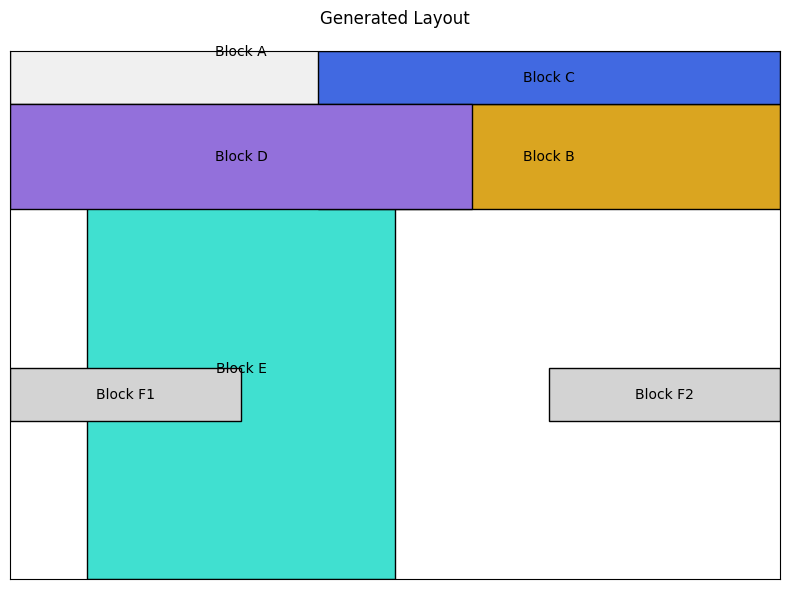

Drawing layout 2


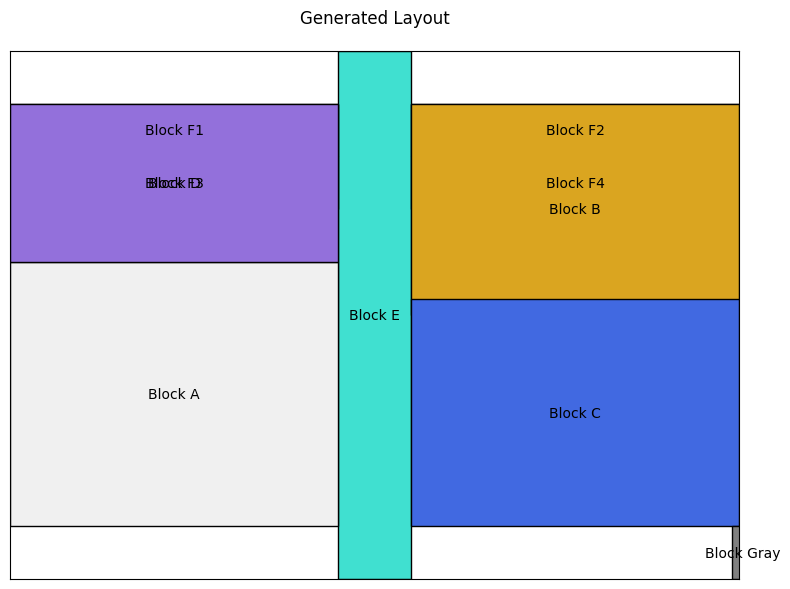

In [ ]:
import matplotlib.pyplot as plt  
import matplotlib.patches as patches  
  
class BlockArrangement:  
    def __init__(self, width=800, height=600):  
        self.total_width = width  
        self.total_height = height  
  
    def draw_layout(self, layout):  
        """Draw the specified layout"""  
        # Create figure and axis  
        fig, ax = plt.subplots(figsize=(8, 6))  
  
        # Create and add rectangles for each block  
        for block_name, block_data in layout.items():  
            # Evaluate string expressions to numerical values if needed  
            x = block_data['x']  
            if isinstance(x, str):  
                x = eval(x.replace('self.total_width', str(self.total_width)).replace('self.total_height', str(self.total_height)))  
  
            y = block_data['y']  
            if isinstance(y, str):  
                y = eval(y.replace('self.total_width', str(self.total_width)).replace('self.total_height', str(self.total_height)))  
  
            width = block_data['width']  
            if isinstance(width, str):  
                width = eval(width.replace('self.total_width', str(self.total_width)).replace('self.total_height', str(self.total_height)))  
  
            height = block_data['height']  
            if isinstance(height, str):  
                height = eval(height.replace('self.total_width', str(self.total_width)).replace('self.total_height', str(self.total_height)))  
  
            rect = patches.Rectangle(  
                (x, y),  
                width,  
                height,  
                facecolor=block_data['color'],  
                edgecolor='black',  
                linewidth=1  
            )  
            ax.add_patch(rect)  
  
            # Add block labels  
            ax.text(  
                x + width / 2,  
                y + height / 2,  
                f'Block {block_name}',  
                horizontalalignment='center',  
                verticalalignment='center',  
                fontsize=10,  
                color='black'  
            )  
  
        # Set axis limits  
        ax.set_xlim(0, self.total_width)  
        ax.set_ylim(0, self.total_height)  
  
        # Remove axis ticks  
        ax.set_xticks([])  
        ax.set_yticks([])  
  
        # Set title  
        plt.title('Generated Layout', pad=20)  
  
        # Adjust layout  
        plt.tight_layout()  
  
        # Show plot  
        plt.show()  
  
# Example usage  
if __name__ == "__main__":  
    # Create an instance of BlockArrangement  
    arranger = BlockArrangement(width=800, height=600)  


#    for idx, layout in enumerate(layouts):
#        print(f"Drawing layouts {idx+1}")
#        arranger.draw_layout(layout)
  
    #       Assume `layouts` is a list of dictionaries generated by the LLM  
    layouts = [  
        # Example layout dictionary  
        {  
            "E": {  
                "x": "0.1 * self.total_width",  
                "y": 0,  
                "width": "0.4 * self.total_width",  
                "height": "0.8 * self.total_height",  
                "color": "#40E0D0"  
            },  
            "F1": {  
                "x": 0,  
                "y": "0.3 * self.total_height",  
                "width": "0.3 * self.total_width",  
                "height": "0.1 * self.total_height",  
                "color": "#D3D3D3"  
            },  
            "F2": {  
                "x": "0.7 * self.total_width",  
                "y": "0.3 * self.total_height",  
                "width": "0.3 * self.total_width",  
                "height": "0.1 * self.total_height",  
                "color": "#D3D3D3"  
            },  
            "A": {  
                "x": 0,  
                "y": "0.9 * self.total_height",  
                "width": "0.6 * self.total_width",  
                "height": "0.2 * self.total_height",  
                "color": "#F0F0F0"  
            },  
            "B": {  
                "x": "0.4 * self.total_width",  
                "y": "0.7 * self.total_height",  
                "width": "0.6 * self.total_width",  
                "height": "0.2 * self.total_height",  
                "color": "#DAA520"  
            },  
            "C": {  
                "x": "0.4 * self.total_width",  
                "y": "0.9 * self.total_height",  
                "width": "0.6 * self.total_width",  
                "height": "0.1 * self.total_height",  
                "color": "#4169E1"  
            },  
            "D": {  
                "x": 0,  
                "y": "0.7 * self.total_height",  
                "width": "0.6 * self.total_width",  
                "height": "0.2 * self.total_height",  
                "color": "#9370DB"  
            }  
        },  
        {  
            "E": {  
                "x": "0.45 * self.total_width",  
                "y": 0,  
                "width": "0.1 * self.total_width",  
                "height": "self.total_height",  
                "color": "#40E0D0"  
            },  
            "F1": {  
                "x": 0,  
                "y": "0.8 * self.total_height",  
                "width": "0.45 * self.total_width",  
                "height": "0.1 * self.total_height",  
                "color": "#D3D3D3"  
            },  
            "F2": {  
                "x": "0.55 * self.total_width",  
                "y": "0.8 * self.total_height",  
                "width": "0.45 * self.total_width",  
                "height": "0.1 * self.total_height",  
                "color": "#D3D3D3"  
            },  
            "F3": {  
                "x": 0,  
                "y": "0.7 * self.total_height",  
                "width": "0.45 * self.total_width",  
                "height": "0.1 * self.total_height",  
                "color": "#D3D3D3"  
            },  
            "F4": {  
                "x": "0.55 * self.total_width",  
                "y": "0.7 * self.total_height",  
                "width": "0.45 * self.total_width",  
                "height": "0.1 * self.total_height",  
                "color": "#D3D3D3"  
            },  
            "A": {  
                "x": 0,  
                "y": "0.1 * self.total_height",  
                "width": "0.45 * self.total_width",  
                "height": "0.5 * self.total_height",  
                "color": "#F0F0F0"  
            },  
            "B": {  
                "x": "0.55 * self.total_width",  
                "y": "0.5 * self.total_height",  
                "width": "0.45 * self.total_width",  
                "height": "0.40 * self.total_height",  
                "color": "#DAA520"  
            },  
            "C": {  
                "x": "0.55 * self.total_width",  
                "y": "0.1 * self.total_height",  
                "width": "0.45 * self.total_width",  
                "height": "0.43 * self.total_height",  
                "color": "#4169E1"  
            },  
            "D": {  
                "x": 0,  
                "y": "0.6 * self.total_height",  
                "width": "0.45 * self.total_width",  
                "height": "0.3 * self.total_height",  
                "color": "#9370DB"  
            },  
            "Gray": {  
                "x": "0.99 * self.total_width",  
                "y": "0.00001 * self.total_height",  
                "width": "0.03 * self.total_width",  
                "height": "0.1 * self.total_height",  
                "color": "#808080"  
            }  
        }  
        # Add more layout dictionaries as needed  
    ]  
  
    # Iterate over each layout and draw it  
    for idx, layout in enumerate(layouts):  
        print(f"Drawing layout {idx + 1}")  
        arranger.draw_layout(layout)  
